In [3]:
import numpy as np
import torch
import torchvision.transforms as transforms
import cv2 as cv
import matplotlib.pyplot as plt
from skimage import exposure
from skimage.exposure import match_histograms

In [4]:
class AddGaussianNoise:
    """Add Gaussian noise to a tensor with a given mean and standard deviation"""
    def __init__(self, mean=0., std=1.):
        self.std = std
        self.mean = mean
        
    def __call__(self, tensor):
        return tensor + torch.randn(tensor.size()) * self.std + self.mean

In [5]:
def plot_histogram(img,title, bins = 100):
    img,grid = torch.histogram(img, bins=bins, density=True)
    img = img.numpy()
    grid = grid.numpy()
    
    plt.bar(grid[1:],img)
    plt.title(title)
    plt.show()

List of transforms to be applied

In [6]:
rgb_transform = transforms.Compose([
                                    transforms.ToTensor(),
                                    transforms.Grayscale(num_output_channels=1),
                                    transforms.Normalize((0.5), (0.5)),
                                    AddGaussianNoise(mean=0.0, std=0.1)])

Testing transforms

torch.Size([1, 540, 960])


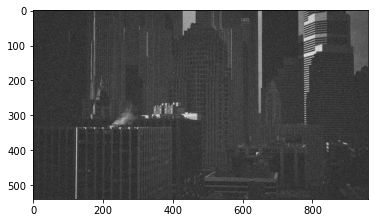

In [7]:
test_image = cv.imread('Sequence037.0422.exr', cv.IMREAD_REDUCED_COLOR_2 + cv.IMREAD_ANYDEPTH)
test_image = rgb_transform(test_image)
print(test_image.shape)
plt.imshow(np.transpose(test_image.numpy(), (1, 2, 0)), cmap='gray')